In [1]:
#Importing Pandas library
import pandas as pd

In [3]:
#Defining file
file_path = "Analytics- interview case- data.csv"

In [5]:
#Reading the csv file
evd=pd.read_csv (file_path, delimiter = ";")

In [9]:
# Showing a small portion (last 5 rows) of data from the uploaded csv file 
print(evd.tail())

      DMV_SNAPSHOT_DATE DMV_SNAPSHOT_ID REGISTRATION_VALID_DATE STATE  \
25042        2024-02-02              83        2024-01-01 00:00    NY   
25043        2024-02-02              83        2024-01-01 00:00    NY   
25044        2024-02-02              83        2024-01-01 00:00    NY   
25045        2024-02-02              83        2024-01-01 00:00    NY   
25046        2024-02-02              83        2024-01-01 00:00    NY   

      VEHICLE_MAKE   VEHICLE_MODEL         VEHICLE_NAME  \
25042         FORD  MUSTANG MACH-E  FORD MUSTANG MACH-E   
25043         FORD  MUSTANG MACH-E  FORD MUSTANG MACH-E   
25044         FORD  MUSTANG MACH-E  FORD MUSTANG MACH-E   
25045         FORD  MUSTANG MACH-E  FORD MUSTANG MACH-E   
25046         FORD  MUSTANG MACH-E  FORD MUSTANG MACH-E   

              VEHICLE_CATEGORY DRIVETRAIN_TYPE  
25042  Light-Duty (Class 1-2A)             BEV  
25043  Light-Duty (Class 1-2A)             BEV  
25044  Light-Duty (Class 1-2A)             BEV  
25045  Lig

In [11]:
# Showing total number of rows and columns available in this dataset before cleaning
rows_evd, col_evd = evd.shape
print (f"Number of rows in the given dataset: {rows_evd}")
print (f"Number of columns in the given dataset: {col_evd}")

Number of rows in the given dataset: 25047
Number of columns in the given dataset: 9


In [139]:
#Data Preproceesing and Cleaning
# Handling missing values
evd.dropna(inplace=True)

In [141]:
#Convert date columns to datetime format
evd["DMV_SNAPSHOT_DATE"] = pd.to_datetime(evd["DMV_SNAPSHOT_DATE"], errors="coerce")
evd["REGISTRATION_VALID_DATE"] = pd.to_datetime(evd["REGISTRATION_VALID_DATE"], errors="coerce")

In [143]:
#Convert ID to numerical column
evd["DMV_SNAPSHOT_ID"] = pd.to_numeric(evd["DMV_SNAPSHOT_ID"], errors="coerce")

In [145]:
#Standardize text values 
text_values= ["STATE","VEHICLE_MAKE","VEHICLE_MODEL", "VEHICLE_NAME", "VEHICLE_CATEGORY","DRIVETRAIN_TYPE"]
for val in text_values:
    evd[val] = evd[val].astype(str).str.strip().str.upper()  # This removes the unwanted spaces between texts and converts lowercase to uppercase letters for columns which has values(strings)

In [147]:
print(evd.head(10))

  DMV_SNAPSHOT_DATE  DMV_SNAPSHOT_ID REGISTRATION_VALID_DATE STATE  \
0        2024-01-13             14.0              2024-01-01    MN   
1        2024-01-13             14.0              2024-01-01    MN   
2        2024-01-13             14.0              2024-01-01    MN   
3        2024-01-13             14.0              2024-01-01    MN   
4        2024-01-13             14.0              2024-01-01    MN   
5        2024-01-13             14.0              2024-01-01    MN   
6        2024-01-13             14.0              2024-01-01    MN   
7        2024-01-13             14.0              2024-01-01    MN   
8        2024-01-13             14.0              2024-01-01    MN   
9        2024-01-13             14.0              2024-01-01    MN   

  VEHICLE_MAKE VEHICLE_MODEL VEHICLE_NAME         VEHICLE_CATEGORY  \
0         FORD         F-150   FORD F-150  LIGHT-DUTY (CLASS 1-2A)   
1         FORD         F-150   FORD F-150  LIGHT-DUTY (CLASS 1-2A)   
2         FORD     

In [149]:
# Removing duplicates
evd_cleaned = evd.drop_duplicates()

In [151]:
#Cleaned dataset
rows_evd_clean, col_evd_clean = evd_cleaned.shape
print (f"Number of rows in the cleaned dataset: {rows_evd_clean}")
print (f"Number of columns in the cleaned dataset: {col_evd_clean}")

Number of rows in the cleaned dataset: 596
Number of columns in the cleaned dataset: 9


In [153]:
print(evd_cleaned.head(10))

   DMV_SNAPSHOT_DATE  DMV_SNAPSHOT_ID REGISTRATION_VALID_DATE STATE  \
0         2024-01-13             14.0              2024-01-01    MN   
7         2024-01-13             14.0              2024-01-01    MN   
18        2024-01-13             14.0              2024-01-01    MN   
19        2024-01-13             14.0              2024-01-01    MN   
31        2024-01-13             14.0              2024-01-01    MN   
37        2024-01-13             14.0              2024-01-01    MN   
45        2024-01-13             14.0              2024-01-01    MN   
46        2024-01-13             14.0              2024-01-01    MN   
47        2024-01-13             14.0              2024-01-01    MN   
48        2024-01-13             14.0              2024-01-01    MN   

   VEHICLE_MAKE              VEHICLE_MODEL  \
0          FORD                      F-150   
7        RIVIAN                        R1T   
18          JEE             GRAND CHEROKEE   
19         JEEP             GRAND 

In [179]:
# Rename incorrect vehicle make value
evd_cleaned["VEHICLE_MAKE"] = evd_cleaned["VEHICLE_MAKE"].replace("TE$L@", "TESLA")
evd_cleaned["VEHICLE_MAKE"] = evd_cleaned["VEHICLE_MAKE"].replace("JEE", "JEEP")
evd_cleaned["STATE"] = evd_cleaned["STATE"].replace("NEW YORK", "NY")

In [181]:
# Remove NaN values from relevant columns
evd_cleaned = evd_cleaned.dropna(subset=["VEHICLE_CATEGORY", "DRIVETRAIN_TYPE"])

In [183]:
#Importing libraries Matplotlin and Seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
plt.style.use("dark_background")
sns.set_style("darkgrid")

In [187]:
# Defining a custom function to show the data labels in the chart
def data_labels(dl):
    for container in dl.containers:
        dl.bar_label(container, fmt="%d", label_type="edge", fontsize=10,color="black",padding =3)

C:\Users\samoh\AppData\Local\Temp\ipykernel_40876\3929440497.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  dl=sns.countplot(y=evd_cleaned["VEHICLE_CATEGORY"], order=evd_cleaned["VEHICLE_CATEGORY"].value_counts().index, palette="Blues_r")


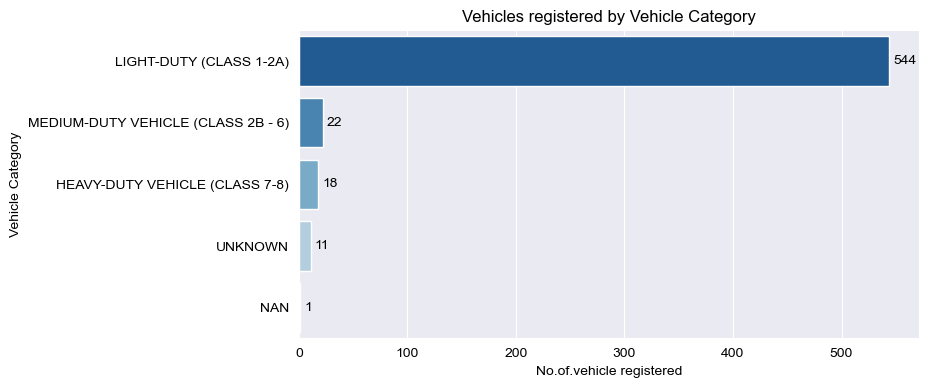

In [189]:
# Segmentation of Vehicle registered by Vehicle Category
plt.figure(figsize=(8, 4))
dl=sns.countplot(y=evd_cleaned["VEHICLE_CATEGORY"], order=evd_cleaned["VEHICLE_CATEGORY"].value_counts().index, palette="Blues_r")
data_labels(dl)
plt.xlabel("No.of.vehicle registered", color="black")
plt.ylabel("Vehicle Category", color="black")
plt.title("Vehicles registered by Vehicle Category", color="black")
plt.xticks(color="black")
plt.yticks(color="black")
plt.show()

C:\Users\samoh\AppData\Local\Temp\ipykernel_40876\1939204427.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  dl=sns.countplot(x=evd_cleaned["DRIVETRAIN_TYPE"], order=evd_cleaned["DRIVETRAIN_TYPE"].value_counts().index, palette="Blues_r")


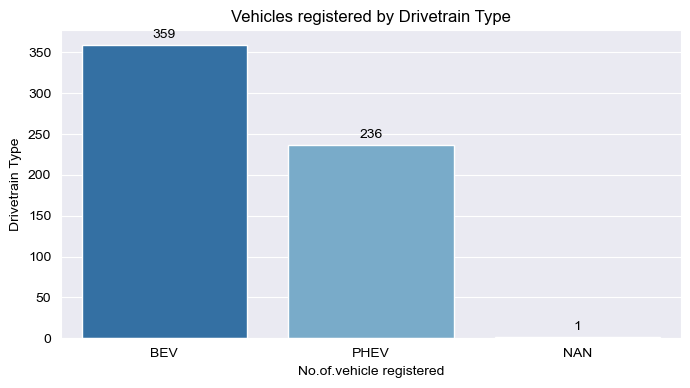

In [191]:
# Segmentation of Vehicle registered by Drivetrain type
plt.figure(figsize=(8,4))
dl=sns.countplot(x=evd_cleaned["DRIVETRAIN_TYPE"], order=evd_cleaned["DRIVETRAIN_TYPE"].value_counts().index, palette="Blues_r")
data_labels(dl)
plt.xlabel("No.of.vehicle registered", color="black")
plt.ylabel("Drivetrain Type", color="black")
plt.title("Vehicles registered by Drivetrain Type", color="black")
plt.xticks(color="black")
plt.yticks(color="black")
plt.show()

C:\Users\samoh\AppData\Local\Temp\ipykernel_40876\3763464255.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  dl=sns.countplot(y=evd_cleaned["VEHICLE_MAKE"], order=evd_cleaned["VEHICLE_MAKE"].value_counts().index, palette="Blues_r")


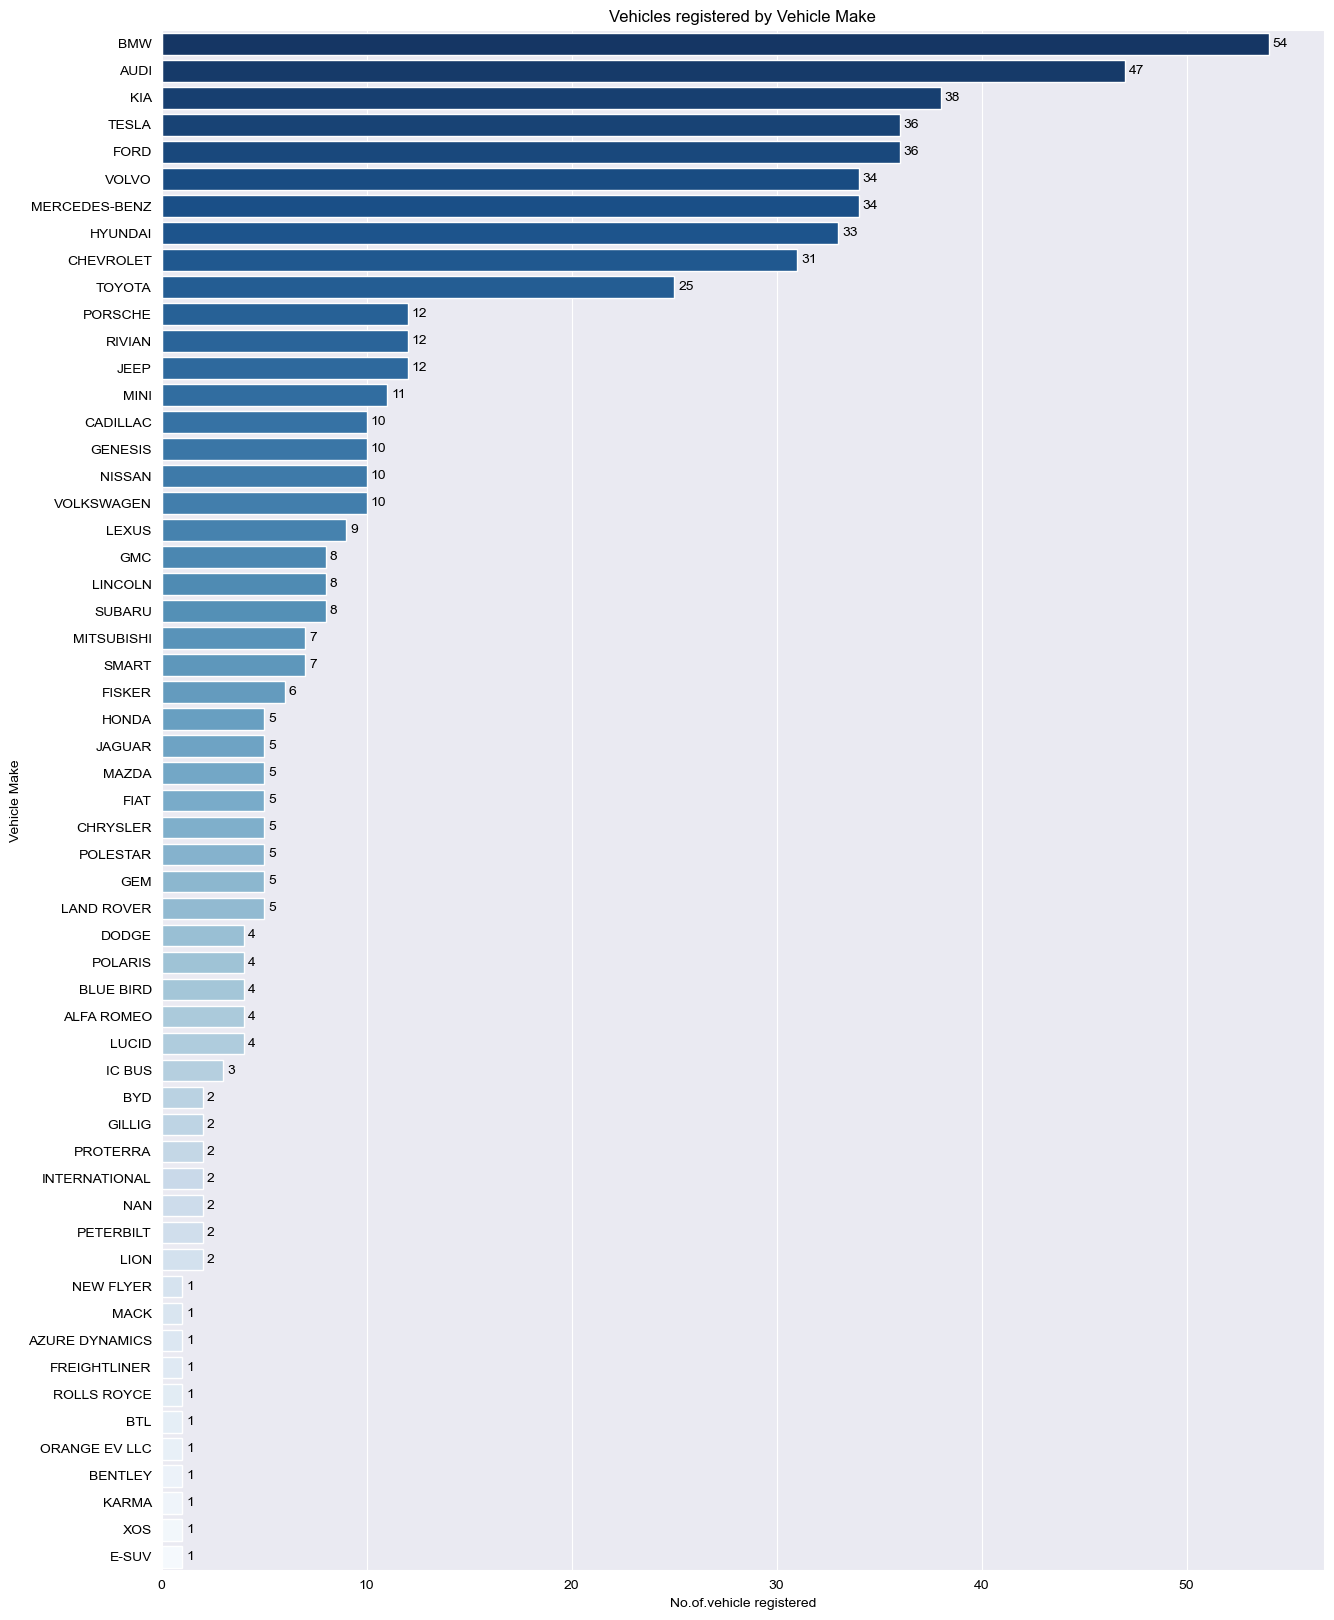

In [193]:
# Segmentation of Vehicle registered by Vehicle make
plt.figure(figsize=(15,20))
dl=sns.countplot(y=evd_cleaned["VEHICLE_MAKE"], order=evd_cleaned["VEHICLE_MAKE"].value_counts().index, palette="Blues_r")
data_labels(dl)
plt.xlabel("No.of.vehicle registered", color="black")
plt.ylabel("Vehicle Make", color="black")
plt.title("Vehicles registered by Vehicle Make", color="black")
plt.xticks(color="black")
plt.yticks(color="black")
plt.show()

C:\Users\samoh\AppData\Local\Temp\ipykernel_40876\1649599925.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  dl=sns.barplot(y=top_10.index, x=top_10.values, palette="Blues_r")


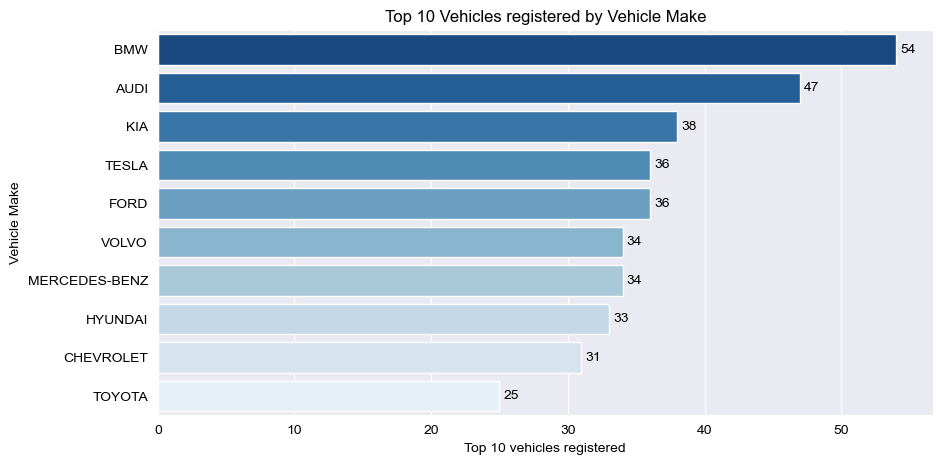

In [195]:
# Top 10 Vehicle registered by Vehicle make
plt.figure(figsize=(10,5))
top_10 = evd_cleaned["VEHICLE_MAKE"].value_counts().head(10)
dl=sns.barplot(y=top_10.index, x=top_10.values, palette="Blues_r")
data_labels(dl)
plt.xlabel("Top 10 vehicles registered", color="black")
plt.ylabel("Vehicle Make", color="black")
plt.title("Top 10 Vehicles registered by Vehicle Make", color="black")
plt.xticks(color="black")
plt.yticks(color="black")
plt.show()

C:\Users\samoh\AppData\Local\Temp\ipykernel_40876\4245231965.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  dl=sns.countplot(x=evd_cleaned["STATE"], order=evd_cleaned["STATE"].value_counts().index, palette="Blues_r")


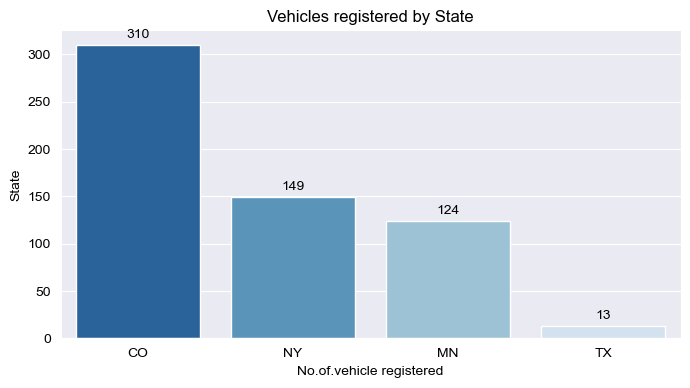

In [197]:
# Segmentation of Vehicle registered by each State
plt.figure(figsize=(8,4))
dl=sns.countplot(x=evd_cleaned["STATE"], order=evd_cleaned["STATE"].value_counts().index, palette="Blues_r")
data_labels(dl)
plt.xlabel("No.of.vehicle registered", color="black")
plt.ylabel("State", color="black")
plt.title("Vehicles registered by State", color="black")
plt.xticks(color="black")
plt.yticks(color="black")
plt.show()

In [331]:
# Identify categorical outliers based on frequency threshold
category_threshold = 5
drivetrain_threshold = 5
outlier_vehicle_categories = evd_cleaned["VEHICLE_CATEGORY"].value_counts()[evd_cleaned["VEHICLE_CATEGORY"].value_counts() < category_threshold].index
outlier_drivetrain_types = evd_cleaned["DRIVETRAIN_TYPE"].value_counts()[evd_cleaned["DRIVETRAIN_TYPE"].value_counts() < drivetrain_threshold].index

In [335]:
category_counts = evd_cleaned["VEHICLE_CATEGORY"].value_counts()
drivetrain_counts = evd_cleaned["DRIVETRAIN_TYPE"].value_counts()

C:\Users\samoh\AppData\Local\Temp\ipykernel_40876\3374343458.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  dl=sns.barplot(x=category_counts.index, y=category_counts.values, ax=axes[0], palette="Blues_r")
C:\Users\samoh\AppData\Local\Temp\ipykernel_40876\3374343458.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(category_counts.index, rotation=45, color="black")
C:\Users\samoh\AppData\Local\Temp\ipykernel_40876\3374343458.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  dl=sns.barplot(x=drivetrain_counts.index, y=drivetrain_counts.values, ax=axes[1], palette="Blues_r")
C:\Users\samoh\AppData\Loc

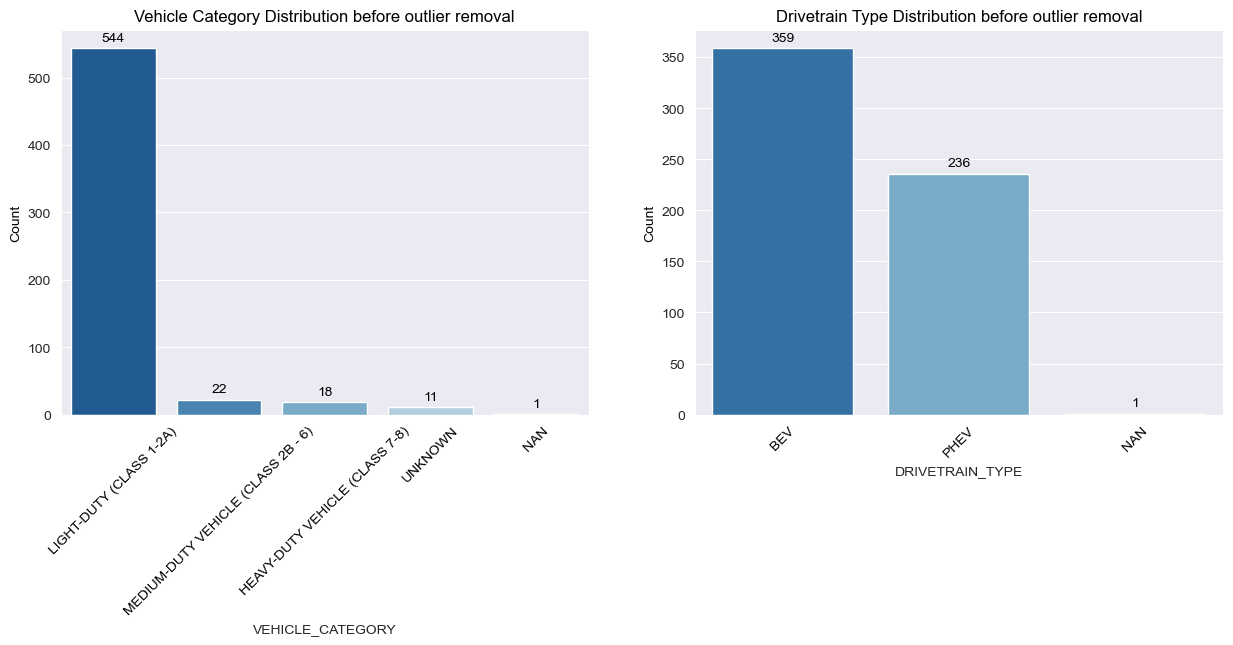

In [341]:
# Plot categorical distributions before outlier removal
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
dl=sns.barplot(x=category_counts.index, y=category_counts.values, ax=axes[0], palette="Blues_r")
data_labels(dl)
axes[0].set_title("Vehicle Category Distribution before outlier removal", color="black")
axes[0].set_xticklabels(category_counts.index, rotation=45, color="black")
axes[0].set_ylabel("Count", color="black")

dl=sns.barplot(x=drivetrain_counts.index, y=drivetrain_counts.values, ax=axes[1], palette="Blues_r")
data_labels(dl)
axes[1].set_title("Drivetrain Type Distribution before outlier removal", color="black")
axes[1].set_xticklabels(drivetrain_counts.index, rotation=45, color="black")
axes[1].set_ylabel("Count", color="black")

plt.show()

In [353]:
# Identify categorical outliers based on frequency threshold 
category_threshold = 5
drivetrain_threshold = 5
outlier_vehicle_categories = evd_cleaned["VEHICLE_CATEGORY"].value_counts()[evd_cleaned["VEHICLE_CATEGORY"].value_counts() < category_threshold].index
outlier_drivetrain_types = evd_cleaned["DRIVETRAIN_TYPE"].value_counts()[evd_cleaned["DRIVETRAIN_TYPE"].value_counts() < drivetrain_threshold].index

In [355]:
category_counts = evd_cleaned["VEHICLE_CATEGORY"].value_counts()
drivetrain_counts = evd_cleaned["DRIVETRAIN_TYPE"].value_counts()

In [357]:
# Remove categorical outliers
evd_cleaned = evd_cleaned[~evd_cleaned["VEHICLE_CATEGORY"].isin(outlier_vehicle_categories)]
evd_cleaned = evd_cleaned[~evd_cleaned["DRIVETRAIN_TYPE"].isin(outlier_drivetrain_types)]

C:\Users\samoh\AppData\Local\Temp\ipykernel_40876\3539128173.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  dl=sns.barplot(x=category_counts.index, y=category_counts.values, ax=axes[0], palette="Blues_r")
C:\Users\samoh\AppData\Local\Temp\ipykernel_40876\3539128173.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(category_counts.index, rotation=45, color="black")
C:\Users\samoh\AppData\Local\Temp\ipykernel_40876\3539128173.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  dl=sns.barplot(x=drivetrain_counts.index, y=drivetrain_counts.values, ax=axes[1], palette="Blues_r")
C:\Users\samoh\AppData\Loc

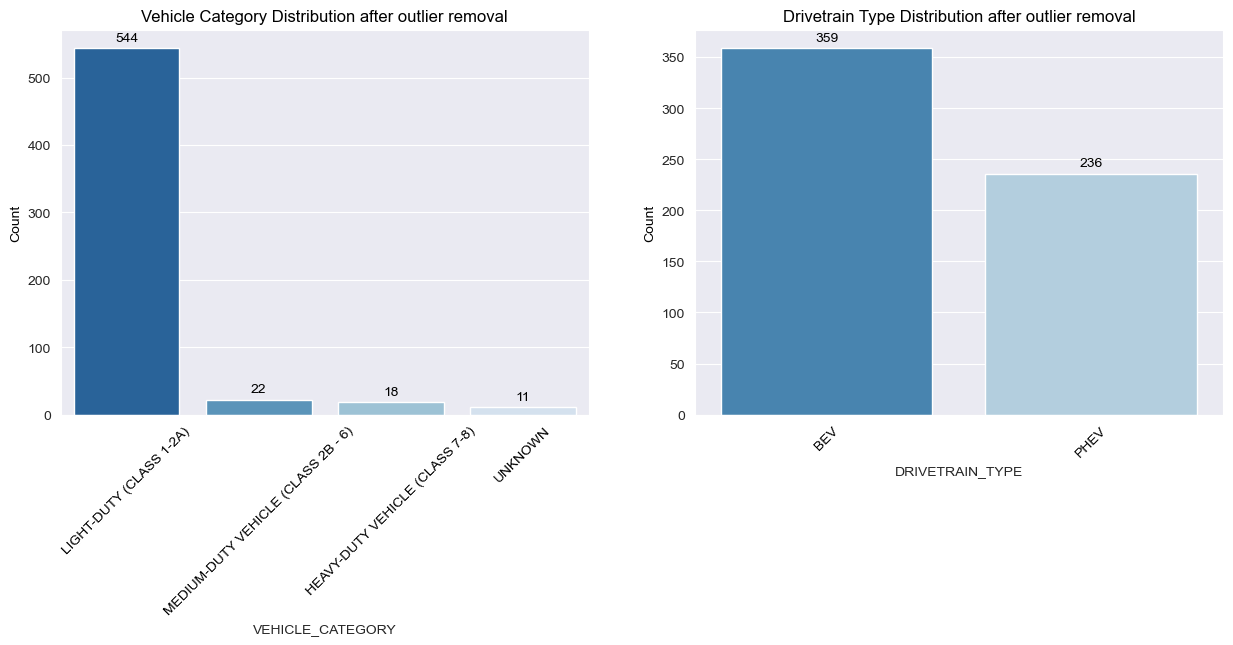

In [361]:
# Plot categorical distributions after outlier removal
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
dl=sns.barplot(x=category_counts.index, y=category_counts.values, ax=axes[0], palette="Blues_r")
data_labels(dl)
axes[0].set_title("Vehicle Category Distribution after outlier removal", color="black")
axes[0].set_xticklabels(category_counts.index, rotation=45, color="black")
axes[0].set_ylabel("Count", color="black")

dl=sns.barplot(x=drivetrain_counts.index, y=drivetrain_counts.values, ax=axes[1], palette="Blues_r")
data_labels(dl)
axes[1].set_title("Drivetrain Type Distribution after outlier removal", color="black")
axes[1].set_xticklabels(drivetrain_counts.index, rotation=45, color="black")
axes[1].set_ylabel("Count", color="black")

plt.show()

In [363]:
# Check for anomalies in DMV_SNAPSHOT_ID (duplicates and gaps)
duplicated_ids = evd_cleaned["DMV_SNAPSHOT_ID"].duplicated().sum()
id_gaps = evd_cleaned["DMV_SNAPSHOT_ID"].sort_values().diff().gt(1).sum()
print(f"Number of duplicated DMV_SNAPSHOT_IDs: {duplicated_ids}")
print(f"Number of gaps in DMV_SNAPSHOT_ID sequence: {id_gaps}")

Number of duplicated DMV_SNAPSHOT_IDs: 591
Number of gaps in DMV_SNAPSHOT_ID sequence: 2


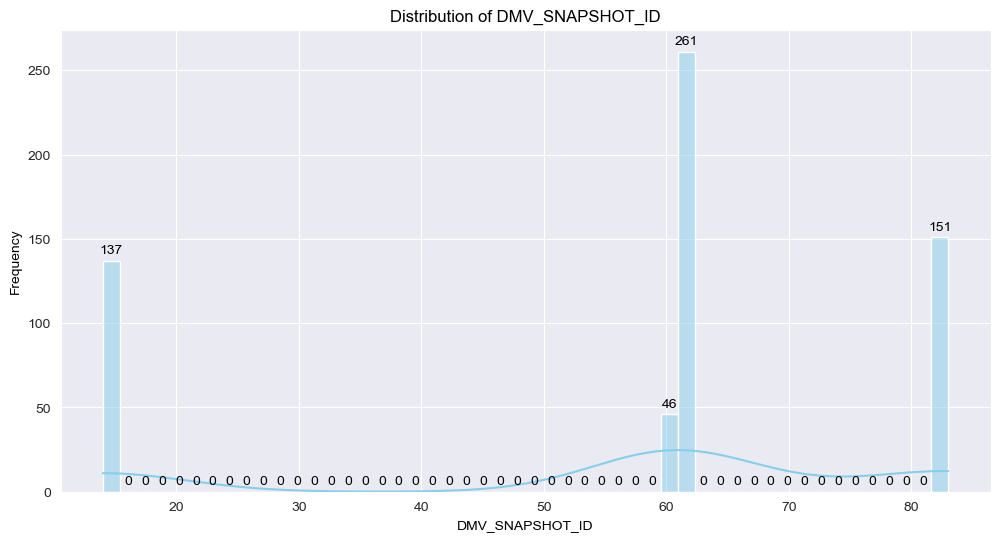

In [365]:
# Plot DMV_SNAPSHOT_ID distribution
plt.figure(figsize=(12, 6))
dl=sns.histplot(evd_cleaned["DMV_SNAPSHOT_ID"], bins=50, kde=True, color="skyblue")
data_labels(dl)
plt.title("Distribution of DMV_SNAPSHOT_ID", color="black")
plt.xlabel("DMV_SNAPSHOT_ID", color="black")
plt.ylabel("Frequency", color="black")
plt.show()

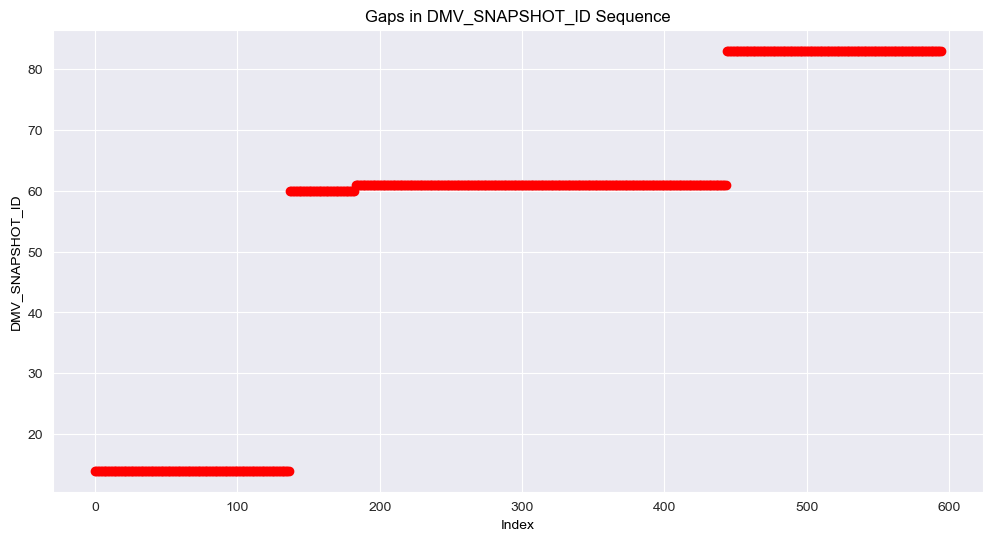

In [379]:
# Scatter plot for DMV_SNAPSHOT_ID gaps
plt.figure(figsize=(12, 6))
plt.plot(evd_cleaned["DMV_SNAPSHOT_ID"].sort_values().values, marker="o", linestyle="None", color="red")
plt.title("Gaps in DMV_SNAPSHOT_ID Sequence", color="black")
plt.xlabel("Index", color="black")
plt.ylabel("DMV_SNAPSHOT_ID", color="black")
plt.show()

In [381]:
# Remove DMV_SNAPSHOT_ID outliers (huge gaps)
evd_cleaned =evd_cleaned.sort_values("DMV_SNAPSHOT_ID").reset_index(drop=True)
id_diff = evd_cleaned["DMV_SNAPSHOT_ID"].diff()
gap_threshold = id_diff.mean() + 3 * id_diff.std()  # Define outlier threshold
outlier_ids = evd_cleaned.loc[id_diff > gap_threshold, "DMV_SNAPSHOT_ID"]
evd_cleaned = evd_cleaned[id_diff.le(gap_threshold) | id_diff.isna()]

In [383]:
# Check for anomalies in DMV_SNAPSHOT_ID (duplicates and gaps) after removal
duplicated_ids = evd_cleaned["DMV_SNAPSHOT_ID"].duplicated().sum()
id_gaps = evd_cleaned["DMV_SNAPSHOT_ID"].sort_values().diff().gt(1).sum()
print(f"Number of duplicated DMV_SNAPSHOT_IDs: {duplicated_ids}")
print(f"Number of gaps in DMV_SNAPSHOT_ID sequence: {id_gaps}")

Number of duplicated DMV_SNAPSHOT_IDs: 589
Number of gaps in DMV_SNAPSHOT_ID sequence: 2


In [385]:
# Print removed DMV_SNAPSHOT_IDs 
print("Removed DMV_SNAPSHOT_IDs due to large gaps:")
print(outlier_ids.to_list())

Removed DMV_SNAPSHOT_IDs due to large gaps:
[60.0, 83.0]


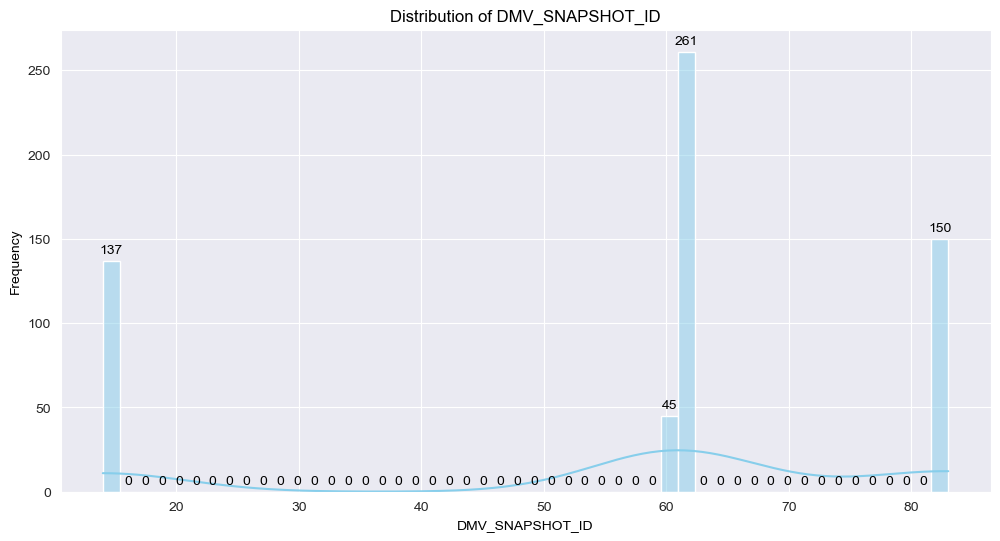

In [387]:
# Plot DMV_SNAPSHOT_ID distribution after removal
plt.figure(figsize=(12, 6))
dl=sns.histplot(evd_cleaned["DMV_SNAPSHOT_ID"], bins=50, kde=True, color="skyblue")
data_labels(dl)
plt.title("Distribution of DMV_SNAPSHOT_ID after removal", color="black")
plt.xlabel("DMV_SNAPSHOT_ID", color="black")
plt.ylabel("Frequency", color="black")
plt.show()

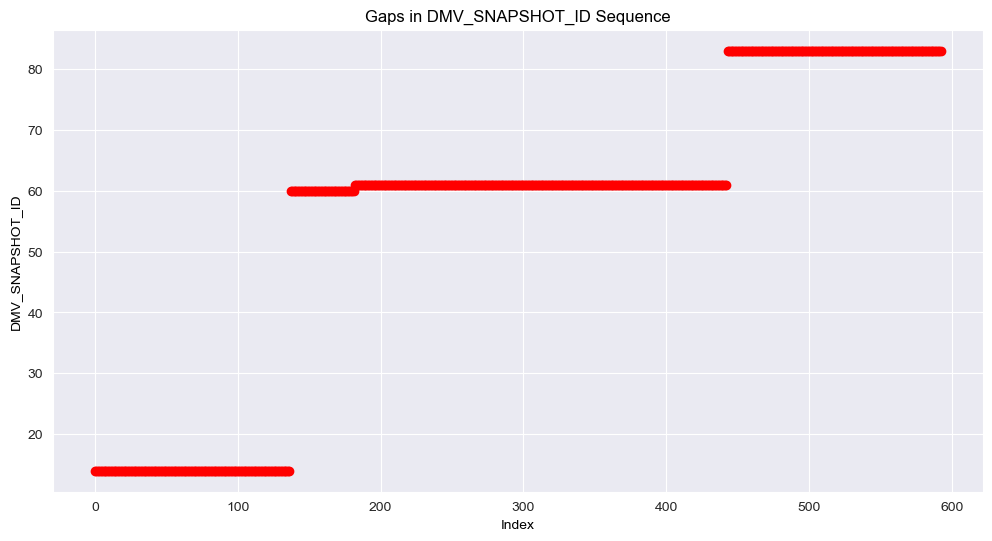

In [389]:
# Scatter plot for DMV_SNAPSHOT_ID gaps after removal
plt.figure(figsize=(12, 6))
plt.plot(evd_cleaned["DMV_SNAPSHOT_ID"].sort_values().values, marker="o", linestyle="None", color="red")
plt.title("Gaps in DMV_SNAPSHOT_ID Sequence after removal", color="black")
plt.xlabel("Index", color="black")
plt.ylabel("DMV_SNAPSHOT_ID", color="black")
plt.show()

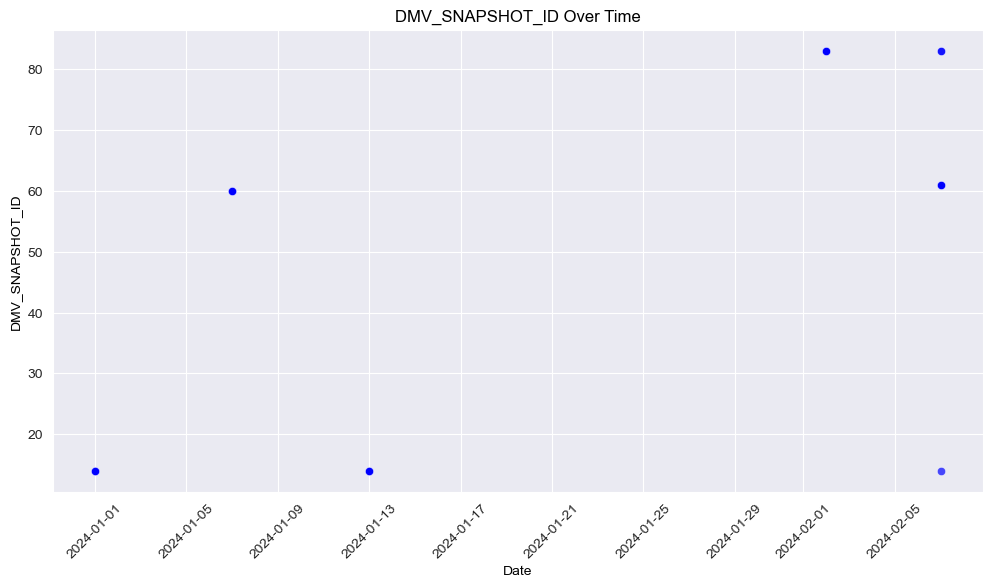

In [419]:
# DMV Snapshot ID vs Time
plt.figure(figsize=(12, 6))
dl=sns.scatterplot(x=evd_cleaned["DMV_SNAPSHOT_DATE"], y=evd_cleaned["DMV_SNAPSHOT_ID"], alpha=0.7, color="blue")
data_labels(dl)
plt.title("DMV_SNAPSHOT_ID Over Time", color="black")
plt.xlabel("Date", color="black")
plt.ylabel("DMV_SNAPSHOT_ID", color="black")
plt.xticks(rotation=45)
plt.show()

In [391]:
# Correlation analysis
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

In [393]:
# Initialize LabelEncoder to correlate categorical data
encoder = LabelEncoder()

In [395]:
# Encode categorical columns
evd_cleaned['VEHICLE_CATEGORY_encoded'] = encoder.fit_transform(evd_cleaned['VEHICLE_CATEGORY'])
evd_cleaned['DRIVETRAIN_TYPE_encoded'] = encoder.fit_transform(evd_cleaned['DRIVETRAIN_TYPE'])
evd_cleaned['VEHICLE_MAKE_encoded'] = encoder.fit_transform(evd_cleaned['VEHICLE_MAKE'])
evd_cleaned['STATE_encoded'] = encoder.fit_transform(evd_cleaned['STATE'])

In [397]:
# Compute the correlation
correlation = evd_cleaned['VEHICLE_CATEGORY_encoded'].corr(evd_cleaned['DRIVETRAIN_TYPE_encoded'])

In [399]:
# Print the correlation value
print(f"Correlation between 'VEHICLE_CATEGORY' and 'DRIVETRAIN_TYPE': {correlation:.4f}")

Correlation between 'VEHICLE_CATEGORY' and 'DRIVETRAIN_TYPE': -0.0585


In [401]:
# If you want to visualize the correlation, you can plot a heatmap of the correlation matrix
correlation_matrix = evd_cleaned[['VEHICLE_CATEGORY_encoded', 'DRIVETRAIN_TYPE_encoded']].corr()

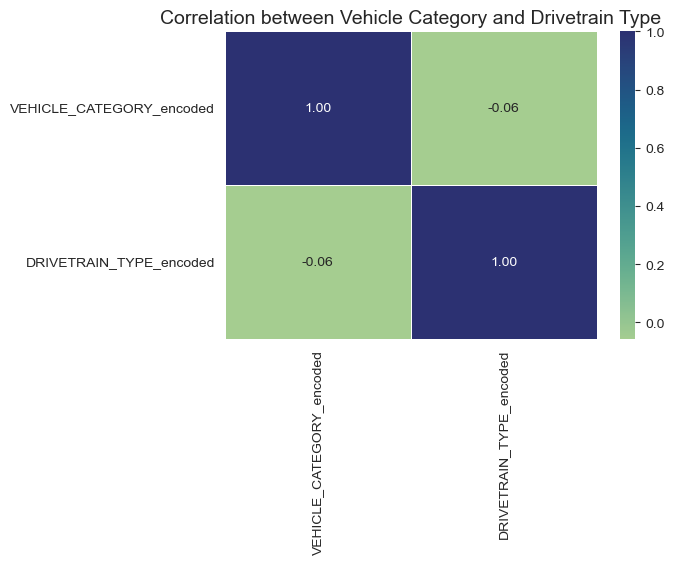

In [403]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="crest", fmt=".2f", linewidths=0.5)
plt.title("Correlation between Vehicle Category and Drivetrain Type", fontsize=14)
plt.show()

In [405]:
# Compute the correlation between the vehicle make and state
correlation = evd_cleaned['VEHICLE_MAKE_encoded'].corr(evd_cleaned['STATE_encoded'])

In [407]:
# Print the correlation value
print(f"Correlation between 'VEHICLE_MAKE' and 'STATE': {correlation:.4f}")

Correlation between 'VEHICLE_MAKE' and 'STATE': 0.0404


In [409]:
# Visualize the correlation using a heatmap
correlation_matrix = evd_cleaned[['VEHICLE_MAKE_encoded', 'STATE_encoded']].corr()

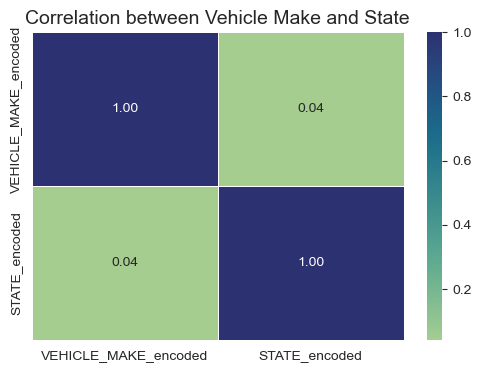

In [411]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="crest", fmt=".2f", linewidths=0.5)
plt.title("Correlation between Vehicle Make and State", fontsize=14)
plt.show()